## An `A <-> B` reaction  
with 1st-order kinetics in both directions, taken to equilibrium,
using a simple, **coarse fixed-timestep simulation.**  

Afterwards, perform some analysis of the results: in particular, examine the reaction rates 

(See also the experiment _"1D/reactions/reaction_1"_ for a multi-compartment version)  

#### This experiment gets repeated in _"react_2_b"_ , with a more sophisticated approach, 
#### involving adaptive variable time steps.

In [1]:
LAST_REVISED = "July 26, 2024"
LIFE123_VERSION = "1.0.0.beta.38"    # Version this experiment is based on

In [2]:
#import set_path            # Using MyBinder?  Uncomment this before running the next cell!
                            # Importing this module will add the project's home directory to sys.path

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path

import numpy as np
import ipynbname

from life123 import check_version, UniformCompartment, PlotlyHelper, GraphicLog

In [4]:
check_version(LIFE123_VERSION)

OK


In [5]:
# Initialize the HTML logging (for the graphics)
log_file = ipynbname.name() + ".log.htm"    # Use the notebook base filename for the log file
                                            # IN CASE OF PROBLEMS, set manually to any desired name

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_2"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'react_2_a.log.htm'


# Initialize the System

In [6]:
# Instantiate the simulator and specify the chemicals
dynamics = UniformCompartment()

# Reaction A <-> B , with 1st-order kinetics in both directions
dynamics.add_reaction(reactants="A", products="B", 
                      forward_rate=3., reverse_rate=2.)

print("Number of reactions: ", dynamics.number_of_reactions())

Number of reactions:  1


In [7]:
dynamics.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A <-> B  (kF = 3 / kR = 2 / delta_G = -1,005.1 / K = 1.5) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'B', 'A'}


In [8]:
# Send a plot of the network of reactions to the HTML log file
dynamics.plot_reaction_network("vue_cytoscape_2")

[GRAPHIC ELEMENT SENT TO LOG FILE `react_2_a.log.htm`]


In [9]:
# Initial concentrations of all the chemicals
dynamics.set_conc({"A": 10., "B": 50.})

In [10]:
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
2 species:
  Species 0 (A). Conc: 10.0
  Species 1 (B). Conc: 50.0
Set of chemicals involved in reactions: {'B', 'A'}


In [11]:
dynamics.get_history()

SYSTEM TIME     A     B            caption
0          0.0  10.0  50.0  Initialized state

### Test your intuition: 
#### given that this reaction operates mostly in the forward direction (kF = 3 , kR = 2 , K = 1.5), 
#### do you think that A will be consumed and B will be produced??
We can take a sneak preview at the final equilibrium concentrations without actually running the simulation:

In [12]:
dynamics.find_equilibrium_conc(rxn_index=0)    # This is an EXACT solution

{'A': 24.0, 'B': 36.0}

#### The reaction will actually proceed IN REVERSE, because of the large initial concentration of B (which we had set to 50), relative to the small initial concentration of A (10)
Now, let's see the reaction in action!

### Run the reaction

In [13]:
# First step of reaction
dynamics.single_compartment_react(initial_step=0.1, n_steps=1, variable_steps=False, 
                                  snapshots={"initial_caption": "first reaction step"})

1 total step(s) taken


In [14]:
dynamics.get_history()

SYSTEM TIME     A     B              caption
0          0.0  10.0  50.0    Initialized state
1          0.1  17.0  43.0  first reaction step

We can already see the reaction proceeding in reverse...

In [15]:
# Numerous more fixed steps
dynamics.single_compartment_react(initial_step=0.1, n_steps=10, variable_steps=False, 
                                  snapshots={"initial_caption": "2nd reaction step",
                                             "final_caption": "last reaction step"})

10 total step(s) taken


In [16]:
dynamics.get_history()

SYSTEM TIME          A          B              caption
0           0.0  10.000000  50.000000    Initialized state
1           0.1  17.000000  43.000000  first reaction step
2           0.2  20.500000  39.500000    2nd reaction step
3           0.3  22.250000  37.750000                     
4           0.4  23.125000  36.875000                     
5           0.5  23.562500  36.437500                     
6           0.6  23.781250  36.218750                     
7           0.7  23.890625  36.109375                     
8           0.8  23.945312  36.054688                     
9           0.9  23.972656  36.027344                     
10          1.0  23.986328  36.013672                     
11          1.1  23.993164  36.006836   last reaction step

## NOTE: for demonstration purposes, we're using FIXED time steps...  
## Typically, one would use the option for adaptive variable time steps (see experiment `react_2_b`)

### Check the final equilibrium

In [17]:
dynamics.get_system_conc()   # The current concentrations, in the order the chemicals were added 

array([23.99316406, 36.00683594])

NOTE: Consistent with the 3/2 ratio of forward/reverse rates (and the 1st order of the reactions), the systems settles in the following equilibrium:

[A] = 23.99316406
 
[B] = 36.00683594


In [18]:
# Verify that the reaction has reached equilibrium
dynamics.is_in_equilibrium()

0: A <-> B
Final concentrations: [A] = 23.99 ; [B] = 36.01
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 1.50071
    Formula used:  [B] / [A]
2. Ratio of forward/reverse reaction rates: 1.5
Discrepancy between the two values: 0.04749 %
Reaction IS in equilibrium (within 1% tolerance)



True

### As noted earlier, because of the high initial concentration of B relative to A, the overall reaction has proceeded IN REVERSE

## Plots of changes of concentration with time

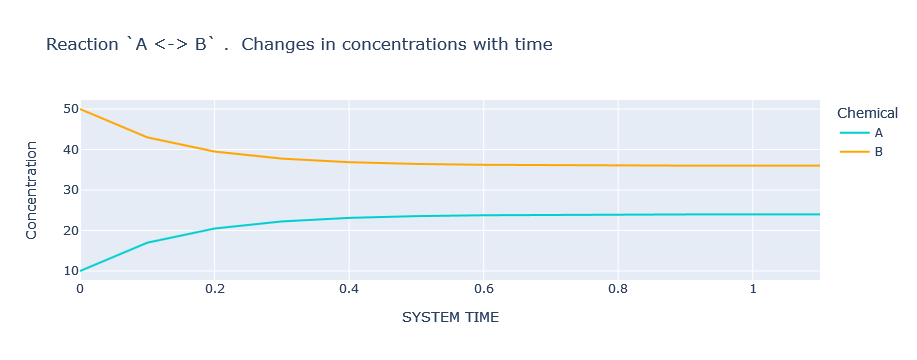

In [19]:
dynamics.plot_history(colors=['darkturquoise', 'orange'])

### Note the raggedness of the left-side (early times) of the curves.  
### In experiment `react_2_b` this simulation gets repeated with an _adaptive variable time resolution_ that takes smaller steps at the beginning, when the reaction is proceeding faster   
### By contrast, here we used _FIXED_ time steps (shown below), which generally gives poor results, unless taking a very large number of very small steps!

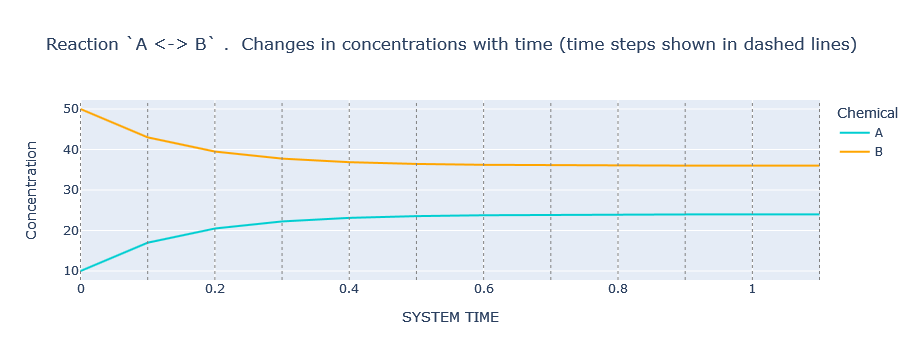

In [20]:
dynamics.plot_history(colors=['darkturquoise', 'orange'], show_intervals=True)

In [21]:
df = dynamics.get_history()         # Revisited from earlier
df

SYSTEM TIME          A          B              caption
0           0.0  10.000000  50.000000    Initialized state
1           0.1  17.000000  43.000000  first reaction step
2           0.2  20.500000  39.500000    2nd reaction step
3           0.3  22.250000  37.750000                     
4           0.4  23.125000  36.875000                     
5           0.5  23.562500  36.437500                     
6           0.6  23.781250  36.218750                     
7           0.7  23.890625  36.109375                     
8           0.8  23.945312  36.054688                     
9           0.9  23.972656  36.027344                     
10          1.0  23.986328  36.013672                     
11          1.1  23.993164  36.006836   last reaction step

## PART 2 - Now investigate A_dot, i.e. d[A]/dt

NOTE: there's actually no need to compute this; it can be automatically saved during the reaction, as demonstrated in experiment `react_2_b`

In [22]:
A = list(df.A)
A

[10.0,
 17.0,
 20.5,
 22.25,
 23.125,
 23.5625,
 23.78125,
 23.890625,
 23.9453125,
 23.97265625,
 23.986328125,
 23.9931640625]

In [23]:
len(A)

12

In [24]:
A_dot = np.gradient(A, 0.1)      # 0.1 is the constant step size

In [25]:
A_dot

array([7.00000000e+01, 5.25000000e+01, 2.62500000e+01, 1.31250000e+01,
       6.56250000e+00, 3.28125000e+00, 1.64062500e+00, 8.20312500e-01,
       4.10156250e-01, 2.05078125e-01, 1.02539062e-01, 6.83593750e-02])

In [26]:
df['A_dot'] = A_dot     # Add a column to the Pandas dataframe

In [27]:
df

SYSTEM TIME          A          B              caption      A_dot
0           0.0  10.000000  50.000000    Initialized state  70.000000
1           0.1  17.000000  43.000000  first reaction step  52.500000
2           0.2  20.500000  39.500000    2nd reaction step  26.250000
3           0.3  22.250000  37.750000                       13.125000
4           0.4  23.125000  36.875000                        6.562500
5           0.5  23.562500  36.437500                        3.281250
6           0.6  23.781250  36.218750                        1.640625
7           0.7  23.890625  36.109375                        0.820312
8           0.8  23.945312  36.054688                        0.410156
9           0.9  23.972656  36.027344                        0.205078
10          1.0  23.986328  36.013672                        0.102539
11          1.1  23.993164  36.006836   last reaction step   0.068359

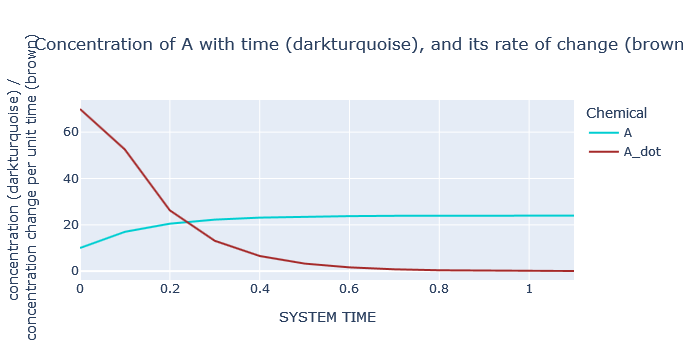

In [28]:
dynamics.plot_history(chemicals=["A", "A_dot"], colors=['darkturquoise', 'brown'], 
                      ylabel="concentration (darkturquoise) /<br> concentration change per unit time (brown)",
                      title="Concentration of A with time (darkturquoise), and its rate of change (brown)")

### At t=0 :  
[A]=10 and [A] has a high rate of change (70)
### As the system approaches equilibrium :  
[A] approaches a value of 24, and its rate of change decays to zero.

#### **NOTE:** The curves are jagged because of limitations of numerically estimating derivatives, as well as _the large time steps taken_ (especially in the early times, when there's a lot of change.)  
## In experiment "react_2_b", we revisit the same reaction using a better approach that employs **_adaptive variable time steps_** , and also automatically saves the reaction rates.